In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from utils import setup_plotting_standards

setup_plotting_standards()
COLOR = '#343434'

In [2]:
results = pd.read_csv( "substitutions/substitutions.csv" )
results.head()

,mutation,node,internal,lineage,ref,position,sub,sub_type
0,C40086A,Africa|LBR|ERR998678|T9|1995-01-01,False,T9,C,40086,A,CA
1,A613113G,Africa|LBR|ERR998678|T9|1995-01-01,False,T9,A,613113,G,AG
2,G1662874A,Africa|LBR|ERR998678|T9|1995-01-01,False,T9,G,1662874,A,GA
3,G2630A,Africa|LBR|ERR998679|T9|1995-01-01,False,T9,G,2630,A,GA
4,A94336G,Africa|LBR|ERR998679|T9|1995-01-01,False,T9,A,94336,G,AG


For each lineage, we could the frequency of each mutation type along its branches.

In [3]:
lineages = ["background", "T9", "T10", "T11", "T12", "T13", "T15"]

total_subs = results.pivot_table( columns="lineage", index="sub_type", values="sub", aggfunc="count", fill_value=0 )
total_subs = total_subs.reindex( index=total_subs.sum(axis=1).sort_values(ascending=False).index, columns=lineages )
freq_subs = (total_subs / total_subs.sum())

total_subs_internal = results.loc[results["internal"]].pivot_table( columns="lineage", index="sub_type", values="sub", aggfunc="count", fill_value=0 )
total_subs_internal = total_subs_internal.reindex( index=total_subs.sum(axis=1).sort_values(ascending=False).index, columns=lineages )
freq_subs_internal = (total_subs_internal / total_subs_internal.sum())

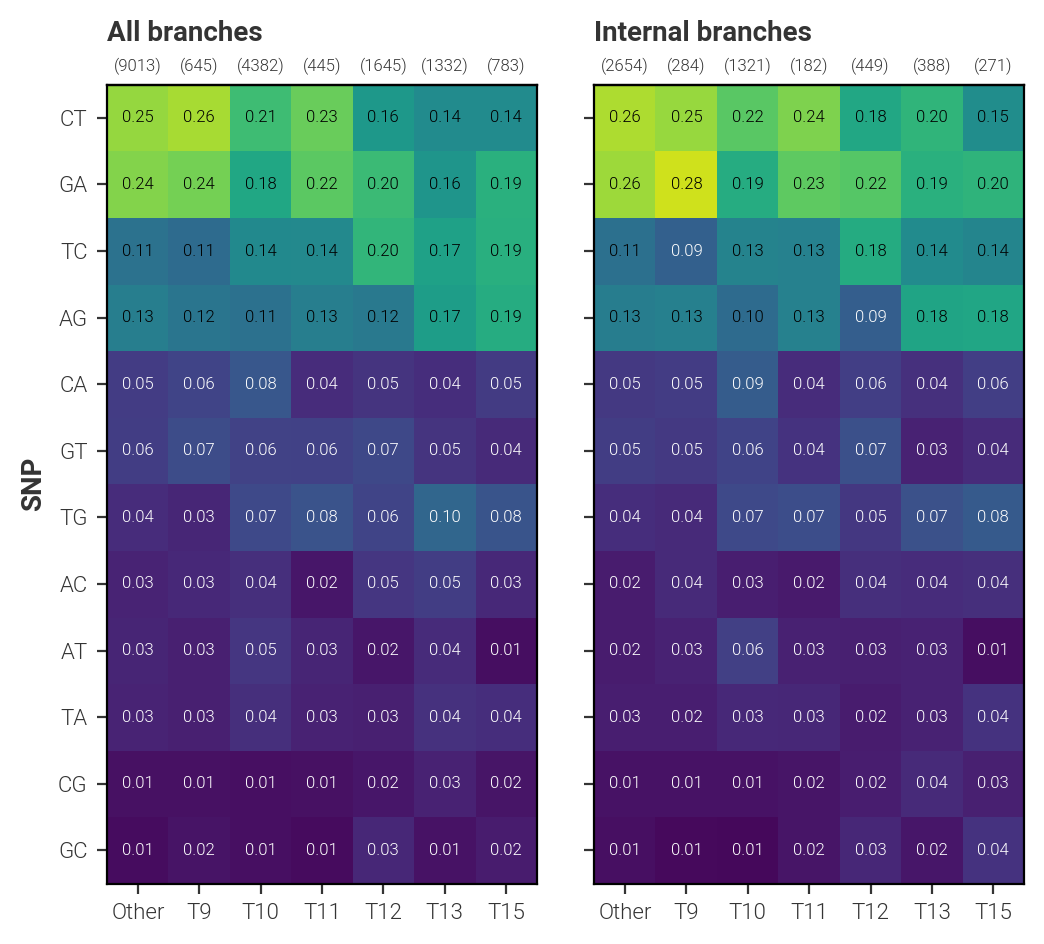

In [4]:
fig, ax = plt.subplots( dpi=200, figsize=(5.5,5), ncols=2, sharex=True, sharey=True )
ax[0].imshow( freq_subs, vmin=0, vmax=0.3, aspect="auto" )
ax[0].set_yticks( range( freq_subs.shape[0] ), freq_subs.index, fontsize=8 )
ax[0].set_xticks( range( len( lineages ) ), [i.replace( "background", "Other" ) for i in lineages], fontsize=8 )
ax[0].set_title( "All branches", loc="left", fontweight="bold", fontsize=10 )
ax[0].set_ylabel( "SNP", fontweight="bold", fontsize=10 )

ax_top = ax[0].secondary_xaxis('top')
totals = total_subs.sum().to_list()
total_labels = [f"({i})" for i in totals]
ax_top.set_xticks(range( len( lineages ) ), total_labels, fontsize=6 )
ax_top.tick_params( top=False, length=0 )

ax_top = ax[1].secondary_xaxis('top')
totals = total_subs_internal.sum().to_list()
total_labels = [f"({i})" for i in totals]
ax_top.set_xticks(range( len( lineages ) ), total_labels, fontsize=6 )
ax_top.tick_params( top=False, length=0 )

for i in range( freq_subs.shape[0] ):
    for j in range( freq_subs.shape[1] ):
        value = freq_subs.iloc[i,j]
        ax[0].text(j, i, f"{value:.2f}", ha="center", va="center", fontsize=6, color="w" if value < 0.1 else "black" )

        value = freq_subs_internal.iloc[i,j]
        ax[1].text(j, i, f"{value:.2f}", ha="center", va="center", fontsize=6, color="w" if value < 0.1 else "black" )

ax[1].imshow( freq_subs_internal, vmin=0, vmax=0.3, aspect="auto" )
ax[1].tick_params( labelsize=8 )

ax[1].set_title( "Internal branches", loc="left", fontweight="bold", fontsize=10 )

plt.tight_layout()
plt.savefig( "plots/figureS4-mutation-profile.pdf" )
plt.show()

In [5]:
transitions = ["CT", "GA", "TC", "AG"]

trans_totals = results.loc[results["sub_type"].isin(transitions)].pivot_table( columns="lineage", index="sub_type", values="sub", aggfunc="count", fill_value=0 )
trans_totals = trans_totals.reindex( index=trans_totals.sum(axis=1).sort_values(ascending=False).index, columns=lineages )
trans_freq = trans_totals / trans_totals.sum()

internal_trans_totals = results.loc[results["sub_type"].isin(transitions)&results["internal"]].pivot_table( columns="lineage", index="sub_type", values="sub", aggfunc="count", fill_value=0 )
internal_trans_totals = internal_trans_totals.reindex( index=trans_totals.sum(axis=1).sort_values(ascending=False).index, columns=lineages )
internal_trans_freq = internal_trans_totals / internal_trans_totals.sum()

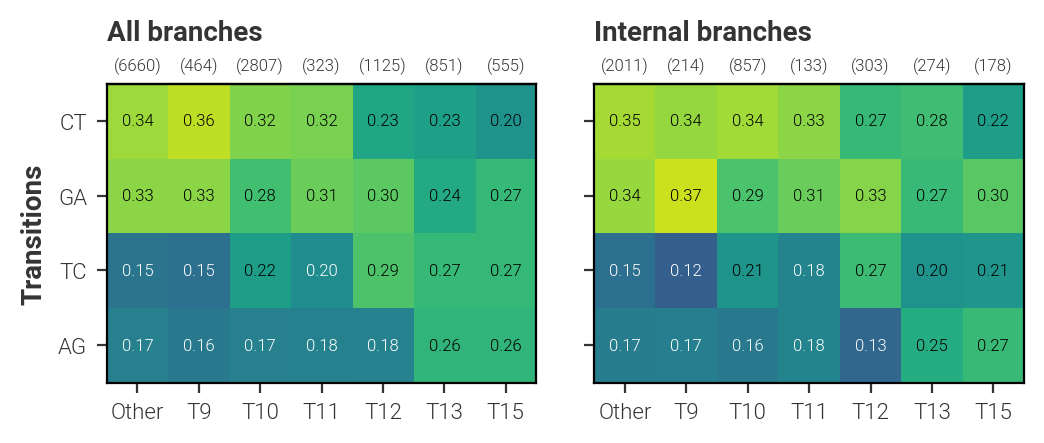

In [6]:
fig, ax = plt.subplots( dpi=200, figsize=(5.5,2.5), ncols=2, sharex=True, sharey=True )
ax[0].imshow( trans_freq, vmin=0, vmax=0.4, aspect="auto" )
ax[0].set_yticks( range( trans_freq.shape[0] ), trans_freq.index, fontsize=8 )
ax[0].set_xticks( range( len( lineages ) ), [i.replace( "background", "Other" ) for i in lineages], fontsize=8 )
ax[0].set_title( "All branches", loc="left", fontweight="bold", fontsize=10 )
ax[0].set_ylabel( "Transitions", fontweight="bold", fontsize=10 )

ax_top = ax[0].secondary_xaxis('top')
totals = trans_totals.sum().to_list()
total_labels = [f"({i})" for i in totals]
ax_top.set_xticks(range( len( lineages ) ), total_labels, fontsize=6 )
ax_top.tick_params( top=False, length=0 )

ax_top = ax[1].secondary_xaxis('top')
totals = internal_trans_totals.sum().to_list()
total_labels = [f"({i})" for i in totals]
ax_top.set_xticks(range( len( lineages ) ), total_labels, fontsize=6 )
ax_top.tick_params( top=False, length=0 )

for i in range( trans_freq.shape[0] ):
    for j in range( trans_freq.shape[1] ):
        value = trans_freq.iloc[i,j]
        ax[0].text(j, i, f"{value:.2f}", ha="center", va="center", fontsize=6, color="w" if value < 0.2 else "black" )

        value = internal_trans_freq.iloc[i,j]
        ax[1].text(j, i, f"{value:.2f}", ha="center", va="center", fontsize=6, color="w" if value < 0.2 else "black" )

ax[1].imshow( internal_trans_freq, vmin=0, vmax=0.4, aspect="auto" )
ax[1].tick_params( labelsize=8 )

ax[1].set_title( "Internal branches", loc="left", fontweight="bold", fontsize=10 )

plt.tight_layout()
fig.savefig( "plots/figureS4-transition-profile.pdf" )
plt.show()

To determine if there are any significant differences in SNP or transition profile between each lineage and the background branches, we use a Chi-squared test. The significance alpha level should be bonferroni-corrected for multiple hypothesis testing, but no lineage approaches anything resembling significance.

In [7]:
print( "Transition frequencies (All branches)" )
for lin in ["T9", "T10", "T11", "T12", "T13", "T15"]:
    chi_test = stats.chisquare( trans_freq[lin], trans_freq["background"])
    print( f"{lin}; X^2 = {chi_test[0]:.3f}; p-value = {chi_test[1]:.4f}" )

print( "\nTransition frequencies (Internal branches)" )
for lin in ["T9", "T10", "T11", "T12", "T13", "T15"]:
    chi_test = stats.chisquare( internal_trans_freq[lin], internal_trans_freq["background"])
    print( f"{lin}; X^2 = {chi_test[0]:.3f}; p-value = {chi_test[1]:.4f}" )

print( "\nAll SNPs (all branches)")
for lin in ["T9", "T10", "T11", "T12", "T13", "T15"]:
    chi_test = stats.chisquare( freq_subs[lin], freq_subs["background"])
    print( f"{lin}; X^2 = {chi_test[0]:.3f}; p-value = {chi_test[1]:.4f}" )

print( "\nAll SNPs (internal branches)")
for lin in ["T9", "T10", "T11", "T12", "T13", "T15"]:
    chi_test = stats.chisquare( freq_subs_internal[lin], freq_subs_internal["background"])
    print( f"{lin}; X^2 = {chi_test[0]:.3f}; p-value = {chi_test[1]:.4f}" )

Transition frequencies (All branches)
T9; X^2 = 0.002; p-value = 1.0000
T10; X^2 = 0.039; p-value = 0.9979
T11; X^2 = 0.014; p-value = 0.9996
T12; X^2 = 0.155; p-value = 0.9844
T13; X^2 = 0.191; p-value = 0.9791
T15; X^2 = 0.194; p-value = 0.9786

Transition frequencies (Internal branches)
T9; X^2 = 0.007; p-value = 0.9998
T10; X^2 = 0.034; p-value = 0.9983
T11; X^2 = 0.012; p-value = 0.9996
T12; X^2 = 0.138; p-value = 0.9869
T13; X^2 = 0.088; p-value = 0.9932
T15; X^2 = 0.134; p-value = 0.9874

All SNPs (all branches)
T9; X^2 = 0.013; p-value = 1.0000
T10; X^2 = 0.087; p-value = 1.0000
T11; X^2 = 0.059; p-value = 1.0000
T12; X^2 = 0.188; p-value = 1.0000
T13; X^2 = 0.270; p-value = 1.0000
T15; X^2 = 0.215; p-value = 1.0000

All SNPs (internal branches)
T9; X^2 = 0.017; p-value = 1.0000
T10; X^2 = 0.140; p-value = 1.0000
T11; X^2 = 0.046; p-value = 1.0000
T12; X^2 = 0.155; p-value = 1.0000
T13; X^2 = 0.154; p-value = 1.0000
T15; X^2 = 0.269; p-value = 1.0000
